In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
columns_to_use = ['id','loan_amnt', 'dti', 'emp_length', 'title','loan_status']

In [105]:
df = pd.read_csv("accepted_2007_to_2018Q4.csv", usecols=columns_to_use)

# Display the first few rows
df.head()

C:\Users\Shawn\AppData\Local\Temp\ipykernel_2564\3069402322.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("accepted_2007_to_2018Q4.csv", usecols=columns_to_use)


,id,loan_amnt,emp_length,loan_status,title,dti
0,68407277,3600.0,10+ years,Fully Paid,Debt consolidation,5.91
1,68355089,24700.0,10+ years,Fully Paid,Business,16.06
2,68341763,20000.0,10+ years,Fully Paid,NaN,10.78
3,66310712,35000.0,10+ years,Current,Debt consolidation,17.06
4,68476807,10400.0,3 years,Fully Paid,Major purchase,25.37


In [101]:
df.tail()

,id,loan_amnt,emp_length,loan_status,is_default
2260696,88985880,40000.0,9 years,current,False
2260697,88224441,24000.0,6 years,charged off,True
2260698,88215728,14000.0,10+ years,current,False
2260699,total amount funded in policy code 1: 1465324575,12900.0,10+ years,fully paid,False
2260700,total amount funded in policy code 2: 521953170,12900.0,10+ years,fully paid,False


In [17]:
# Drop the last two columns
df = df.iloc[:, :-2]

# Verify the change
print(df.head())  # Display the first few rows
print(df.columns)  # Show remaining column names


         id  loan_amnt emp_length loan_status
0  68407277     3600.0  10+ years  Fully Paid
1  68355089    24700.0  10+ years  Fully Paid
2  68341763    20000.0  10+ years  Fully Paid
3  66310712    35000.0  10+ years     Current
4  68476807    10400.0    3 years  Fully Paid
Index(['id', 'loan_amnt', 'emp_length', 'loan_status'], dtype='object')


In [31]:
# Summary statistics for numerical columns
summary_stats = df.describe(include="all")

# Count of missing values per column
missing_values = df.isnull().sum()

# Display results
print(summary_stats)
print("\nMissing Values:")
print(missing_values)


              id     loan_amnt emp_length loan_status is_default
count      65245  2.260701e+06    2260701     2260701    2260701
unique     65245           NaN         11           9          2
top     38272256           NaN  10+ years  fully paid      False
freq           1           NaN     894945     1076784    1991341
mean         NaN  1.504690e+04        NaN         NaN        NaN
std          NaN  9.190182e+03        NaN         NaN        NaN
min          NaN  5.000000e+02        NaN         NaN        NaN
25%          NaN  8.000000e+03        NaN         NaN        NaN
50%          NaN  1.290000e+04        NaN         NaN        NaN
75%          NaN  2.000000e+04        NaN         NaN        NaN
max          NaN  4.000000e+04        NaN         NaN        NaN

Missing Values:
id             2195456
loan_amnt            0
emp_length           0
loan_status          0
is_default           0
dtype: int64


In [21]:


# See size and structure
print(df.shape)
print(df.columns[:10])  # See first 10 column names
print(df.dtypes.value_counts())  # Count of types (object, float, etc.)

# Null counts
nulls = df.isnull().sum().sort_values(ascending=False)
print(nulls[nulls > 0].head(20))  # Top 20 most null-heavy columns

# Look at target column
print(df['loan_status'].value_counts())

# Visualize default rates by grade
df['is_default'] = df['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
default_rate = df.groupby('grade')['is_default'].mean().sort_values(ascending=False)

sns.barplot(x=default_rate.index, y=default_rate.values)
plt.title('Default Rate by Loan Grade')
plt.ylabel('Default Rate')
plt.xlabel('Grade')
plt.show()

# Summary stats
print(df[['loan_amnt', 'int_rate', 'annual_inc', 'dti']].describe())


(2260701, 4)
Index(['id', 'loan_amnt', 'emp_length', 'loan_status'], dtype='object')
object     3
float64    1
Name: count, dtype: int64
emp_length     146940
loan_amnt          33
loan_status        33
dtype: int64
loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64


KeyError: 'grade'

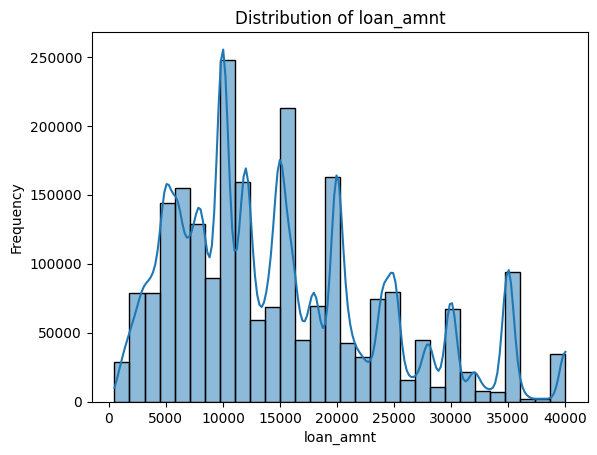

In [23]:
variable = 'loan_amnt'

# Plot the distribution
sns.histplot(df[variable], bins=30, kde=True)
plt.xlabel(variable)
plt.ylabel("Frequency")
plt.title(f"Distribution of {variable}")
plt.show()

In [25]:
# Summarizing a categorical variable (e.g., 'grade')
categorical_var = 'loan_status'

# Frequency count
print(df[categorical_var].value_counts())

# Statistical summary
print(df[categorical_var].describe())


loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64
count        2260668
unique             9
top       Fully Paid
freq         1076751
Name: loan_status, dtype: object


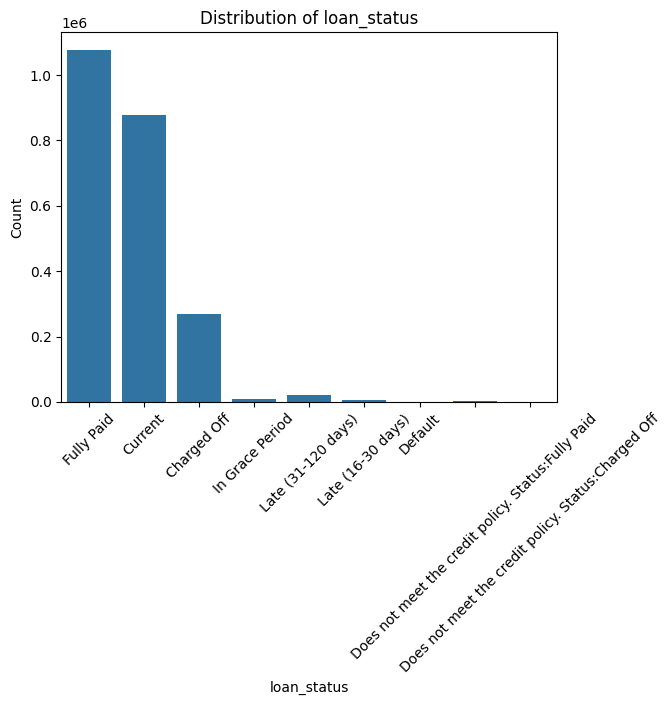

In [27]:
categorical_var = 'loan_status'

# Create a bar plot
sns.countplot(x=df[categorical_var])
plt.xlabel(categorical_var)
plt.ylabel("Count")
plt.title(f"Distribution of {categorical_var}")

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.show()

In [29]:
df = df.drop_duplicates()

# Remove columns where more than 50% of values are missing
threshold = 0.5 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values
for col in df.select_dtypes(include=["number"]).columns:
    df[col] = df[col].fillna(df[col].median())  # Fill numeric columns with median

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical columns with mode

# Standardize text formatting for categorical columns
df = df.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

# Display summary of cleaned dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           object 
 1   loan_amnt    float64
 2   emp_length   object 
 3   loan_status  object 
 4   is_default   bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 71.1+ MB
None


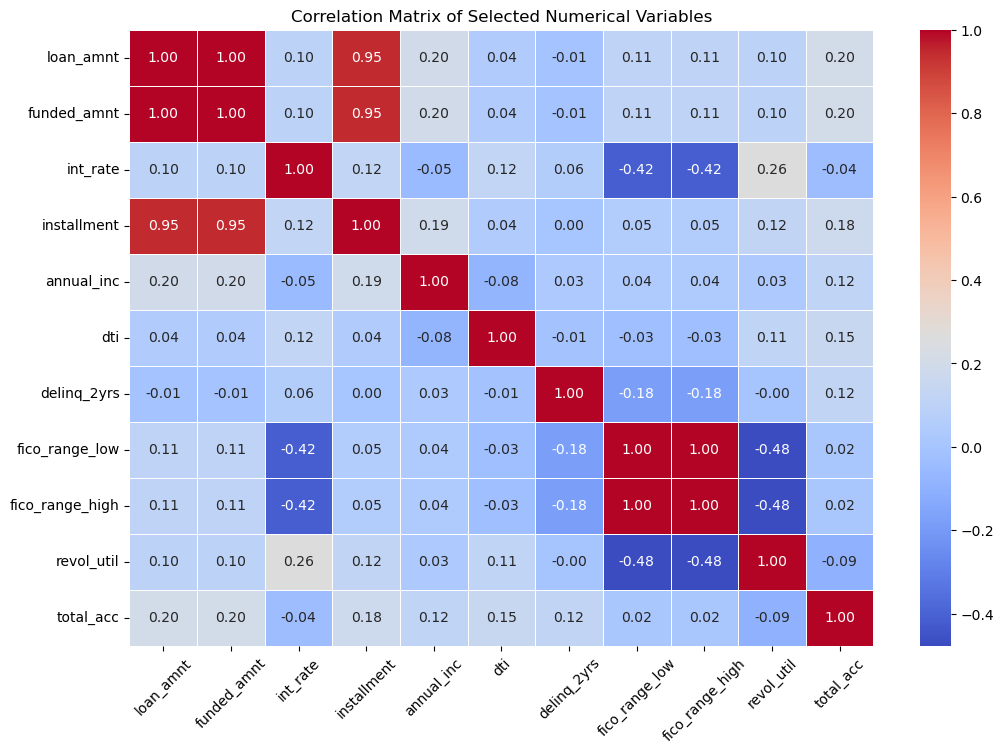

In [37]:
numerical_cols = df.select_dtypes(include=["number"])

# Define selected numerical columns
selected_cols = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
                 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'revol_util', 'total_acc']

# Compute correlation matrix for selected variables
corr_matrix = df[selected_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Selected Numerical Variables")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [107]:
df_def = df
df_def['loan_status'] = df['loan_status'].str.strip().str.lower()





In [109]:
# Define default statuses
default_statuses = [
    'charged off',
    'default',
    'does not meet the credit policy. status:charged off'
]

non_default_statuses = [
    'fully paid',
    'does not meet the credit policy. status:fully paid'
]
# Filter to only default/non-default loans
df_def = df_def[df_def['loan_status'].isin(default_statuses + non_default_statuses)].copy()

# Create binary target
df_def['is_default'] = df_def['loan_status'].isin(default_statuses).astype(int)

# Check the distribution
print(df_def['is_default'].value_counts(normalize=True))


is_default
0    0.800193
1    0.199807
Name: proportion, dtype: float64


In [111]:
df_def.head()

,id,loan_amnt,emp_length,loan_status,title,dti,is_default
0,68407277,3600.0,10+ years,fully paid,Debt consolidation,5.91,0
1,68355089,24700.0,10+ years,fully paid,Business,16.06,0
2,68341763,20000.0,10+ years,fully paid,NaN,10.78,0
4,68476807,10400.0,3 years,fully paid,Major purchase,25.37,0
5,68426831,11950.0,4 years,fully paid,Debt consolidation,10.20,0


In [99]:
# Merge specific columns from df_b into df_a on 'id'
#df_def = df_def.merge(df[['id', 'title', 'dti']], on='id', how='left')



KeyError: "['title', 'dti'] not in index"

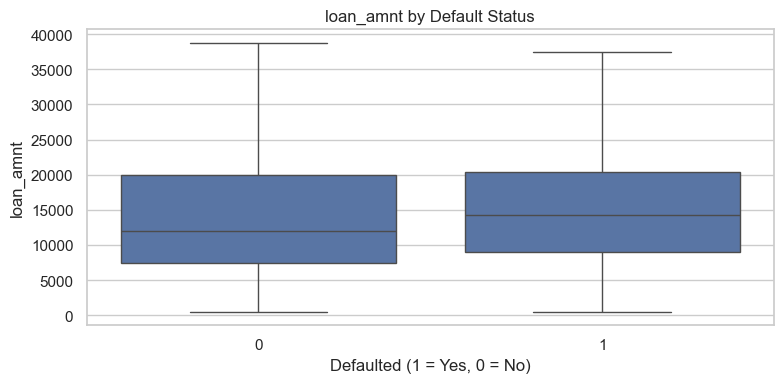

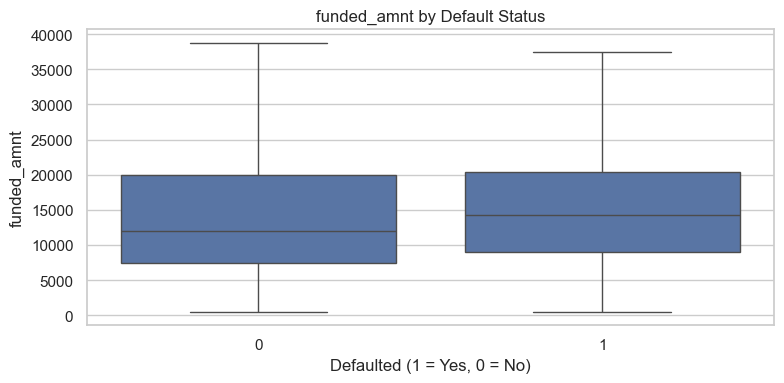

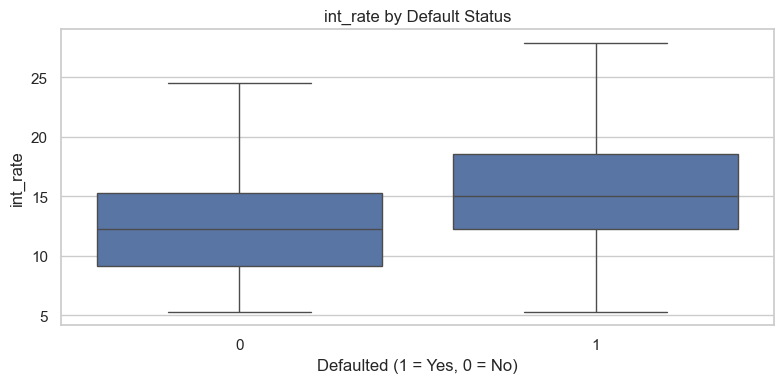

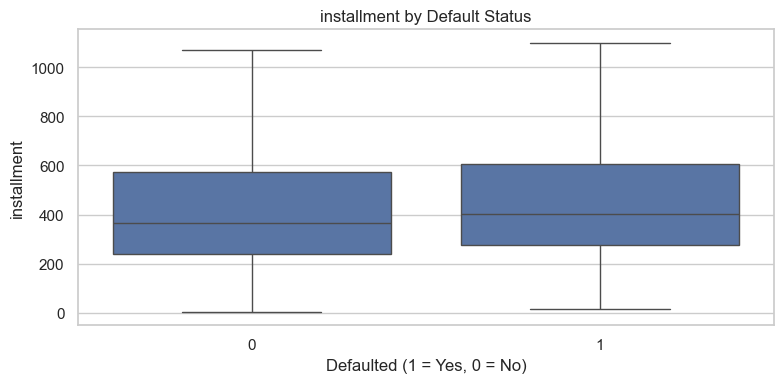

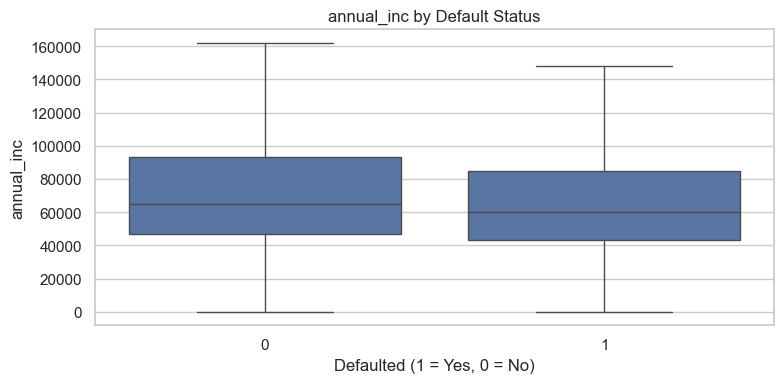

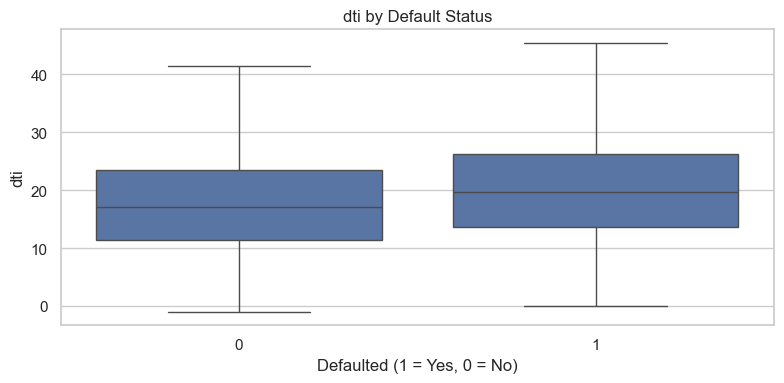

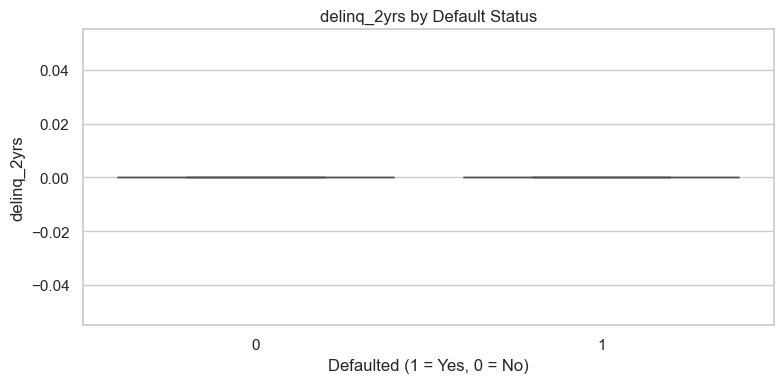

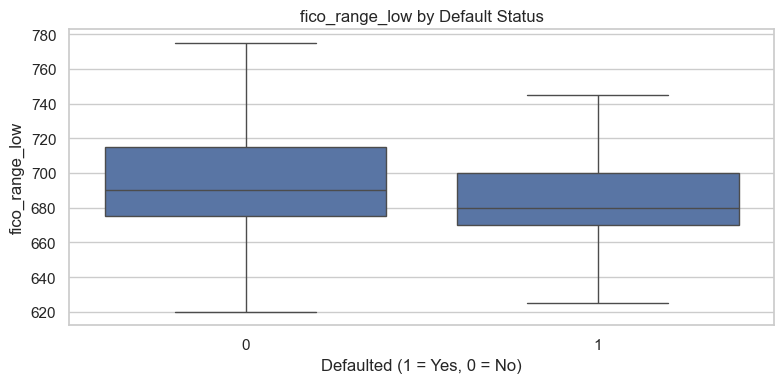

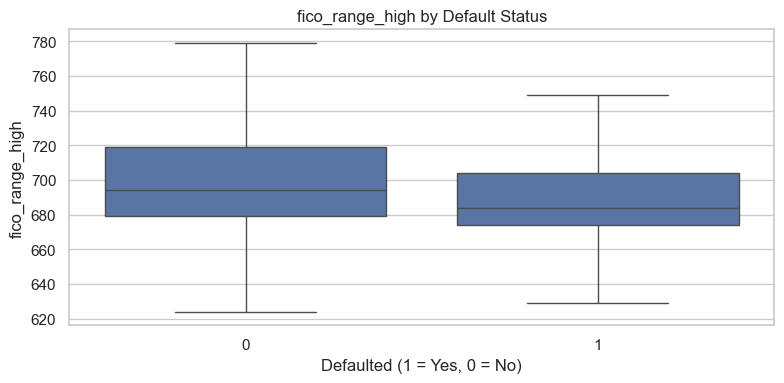

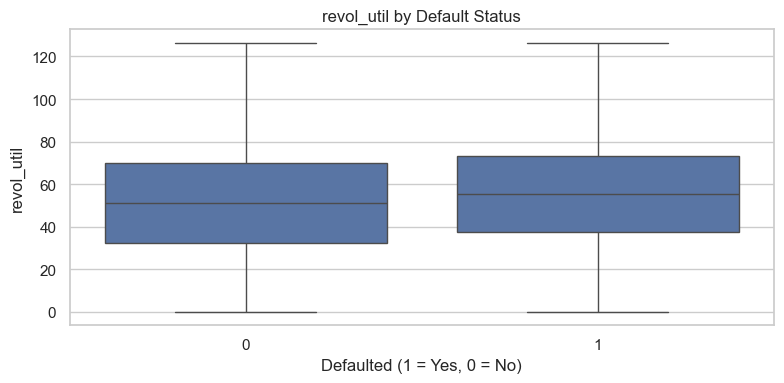

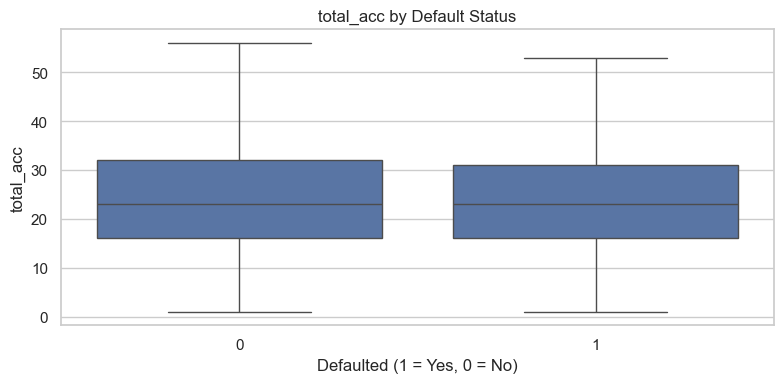

In [63]:
# Set up seaborn style
sns.set(style="whitegrid")

# Loop through each numeric variable and plot boxplots grouped by default
for var in selected_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='is_default', y=var, data=df_def, showfliers=False)
    plt.title(f'{var} by Default Status')
    plt.xlabel('Defaulted (1 = Yes, 0 = No)')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

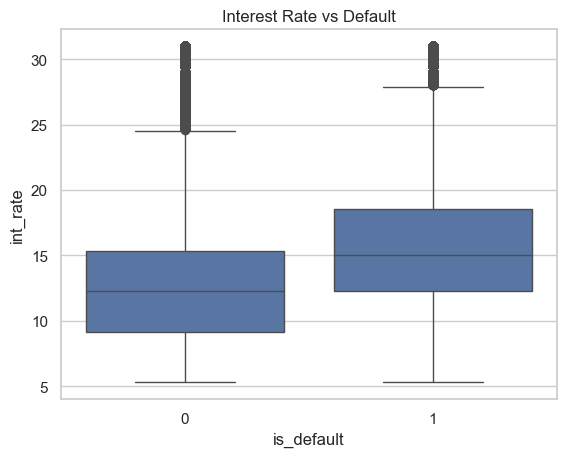

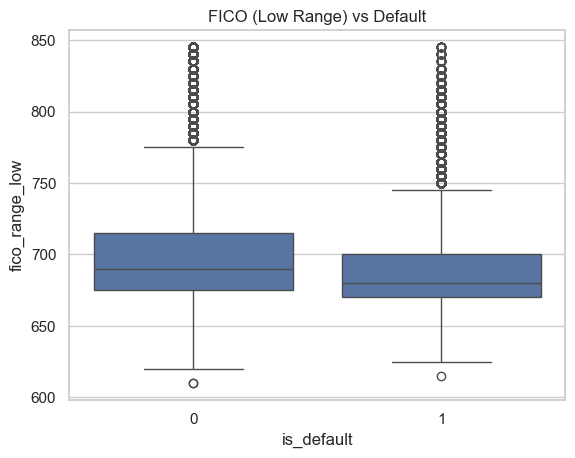

In [67]:
sns.boxplot(x='is_default', y='int_rate', data=df_def)
plt.title('Interest Rate vs Default')
plt.show()

sns.boxplot(x='is_default', y='fico_range_low', data=df_def)
plt.title('FICO (Low Range) vs Default')
plt.show()


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your datasets
unapproved_df = pd.read_csv("rejected_2007_to_2018Q4.csv")
columns_to_use = ['id','loan_amnt', 'dti', 'emp_length', 'title','is_default']
#df = pd.read_csv("accepted_2007_to_2018Q4.csv", usecols=columns_to_use)
rename_dict = {
    'Amount Requested' : 'loan_amnt',
    'Debt-To-Income Ratio' : 'dti',
    'Employment Length' : 'emp_length',
    'Loan Title' : 'title'
}
unapproved_df['Employment Length'] = unapproved_df['Employment Length'].str.extract(r'(\d+)', expand=False).astype(float)
#df_def['emp_length'] = df_def['emp_length'].str.extract(r'(\d+)', expand=False).astype(float)
selected_unapproved_df = unapproved_df[list(rename_dict.keys())]
df_U = selected_unapproved_df.rename(columns=rename_dict)

# Convert 'dti' from percent string to float (e.g., '36%' → 0.36)
df_U['dti'] = df_U['dti'].str.rstrip('%').astype(float) / 100

In [117]:
df_def['emp_length'] = df_def['emp_length'].str.extract(r'(\d+)', expand=False).astype(float)

In [91]:
# Add an 'id' column that uniquely identifies each row
df_U['id'] = range(len(df_U))

In [119]:
print(df_def)

               id  loan_amnt  emp_length  loan_status               title  \
0        68407277     3600.0        10.0   fully paid  Debt consolidation   
1        68355089    24700.0        10.0   fully paid            Business   
2        68341763    20000.0        10.0   fully paid                 NaN   
4        68476807    10400.0         3.0   fully paid      Major purchase   
5        68426831    11950.0         4.0   fully paid  Debt consolidation   
...           ...        ...         ...          ...                 ...   
2260688  89905081    18000.0         5.0   fully paid    Home improvement   
2260690  88948836    29400.0         9.0   fully paid  Debt consolidation   
2260691  89996426    32000.0         3.0  charged off    Home improvement   
2260692  90006534    16000.0        10.0   fully paid    Medical expenses   
2260697  88224441    24000.0         6.0  charged off  Debt consolidation   

           dti  is_default  
0         5.91           0  
1        16.06   

In [73]:
print(unapproved_df)

          Amount Requested Application Date                        Loan Title  \
0                   1000.0       2007-05-26  Wedding Covered but No Honeymoon   
1                   1000.0       2007-05-26                Consolidating Debt   
2                  11000.0       2007-05-27       Want to consolidate my debt   
3                   6000.0       2007-05-27                           waksman   
4                   1500.0       2007-05-27                            mdrigo   
...                    ...              ...                               ...   
27648736           10000.0       2016-12-31                Debt consolidation   
27648737           10000.0       2016-12-31                            moving   
27648738            1200.0       2016-12-31                             Other   
27648739           25000.0       2016-12-31                debt_consolidation   
27648740           15000.0       2016-12-31                          Business   

          Risk_Score Debt-T

In [121]:
print(df_U)

          loan_amnt     dti  emp_length                             title  \
0            1000.0  0.1000         4.0  Wedding Covered but No Honeymoon   
1            1000.0  0.1000         1.0                Consolidating Debt   
2           11000.0  0.1000         1.0       Want to consolidate my debt   
3            6000.0  0.3864         1.0                           waksman   
4            1500.0  0.0943         1.0                            mdrigo   
...             ...     ...         ...                               ...   
27648736    10000.0  0.4126         1.0                Debt consolidation   
27648737    10000.0  0.0148         5.0                            moving   
27648738     1200.0  0.1026         1.0                             Other   
27648739    25000.0  0.1771         1.0                debt_consolidation   
27648740    15000.0  0.1058         1.0                          Business   

                id  
0                0  
1                1  
2           

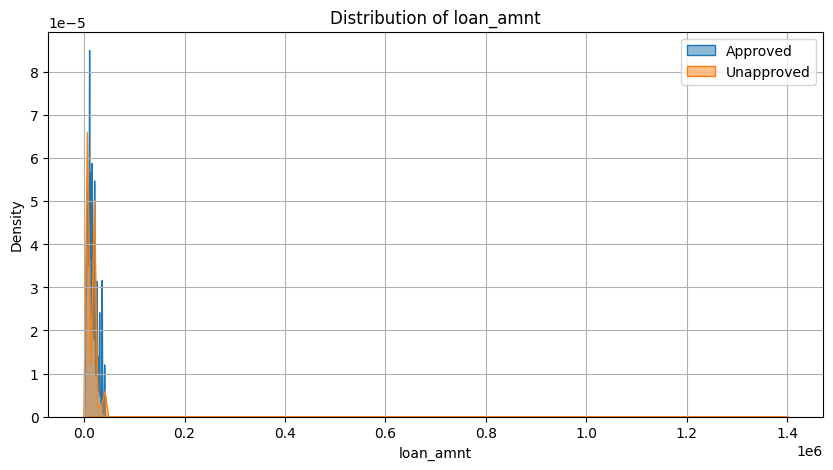

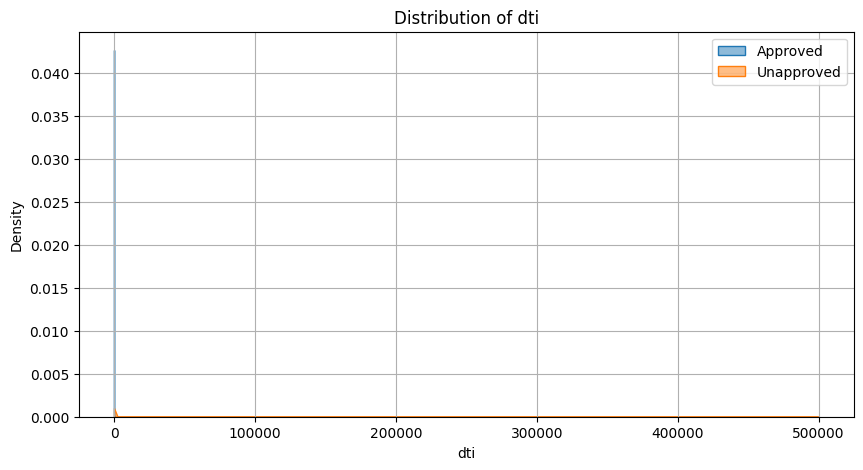

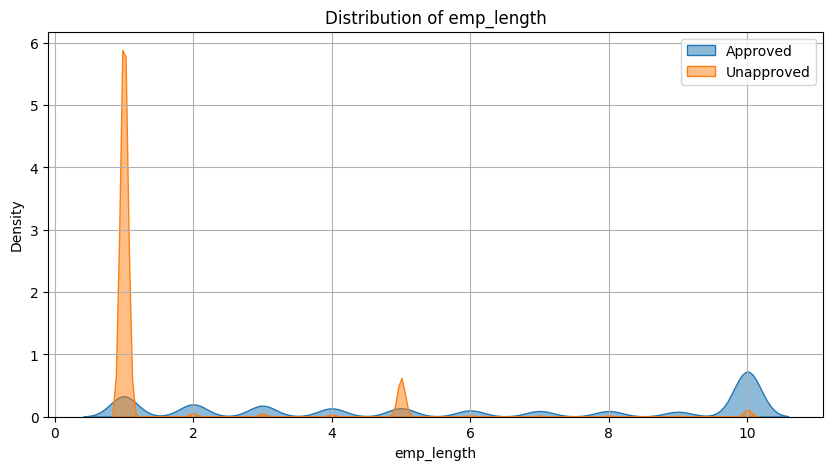

In [65]:

# List the common variables you want to compare (names may differ!)
common_vars = ['loan_amnt', 'dti', 'emp_length']  # Replace with real column names : id, loan_amnt, term, int_rate, 

for var in common_vars:
    plt.figure(figsize=(10, 5))

    # KDE plot (density)
    sns.kdeplot(df[var].dropna(), label='Approved', fill=True, common_norm=False, alpha=0.5)
    sns.kdeplot(df_U[var].dropna(), label='Unapproved', fill=True, common_norm=False, alpha=0.5)

    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()


In [61]:
common_vars = ['loan_amnt', 'dti', 'emp_length']  # Replace with real column names : id, loan_amnt, term, int_rate, 

import pandas as pd

# Loop through variables and compute statistics
for var in common_vars:
    print(f"\nSummary Statistics for {var}:\n{'-'*40}")
    
    approved_stats = df[var].describe()
    unapproved_stats = df_U[var].describe()

    summary = pd.DataFrame({
        'Approved': approved_stats,
        'Unapproved': unapproved_stats
    })

    print(summary.round(2))



Summary Statistics for loan_amnt:
----------------------------------------
         Approved   Unapproved
count  2260668.00  27648741.00
mean     15046.93     13133.24
std       9190.25     15009.64
min        500.00         0.00
25%       8000.00      4800.00
50%      12900.00     10000.00
75%      20000.00     20000.00
max      40000.00   1400000.00

Summary Statistics for dti:
----------------------------------------
         Approved   Unapproved
count  2258957.00  27648741.00
mean        18.82         1.43
std         14.18       105.39
min         -1.00        -0.01
25%         11.89         0.08
50%         17.84         0.20
75%         24.49         0.37
max        999.00    500000.31

Summary Statistics for emp_length:
----------------------------------------
         Approved   Unapproved
count  2113761.00  26697386.00
mean         6.02         1.57
std          3.59         1.66
min          1.00         1.00
25%          2.00         1.00
50%          6.00         1.00
75

In [123]:
categorical_vars = ['title']  # Replace with actual names

for cat in categorical_vars:
    approved_counts = df_def[cat].value_counts(normalize=True)
    unapproved_counts = df_U[cat].value_counts(normalize=True)

    comparison_df = pd.DataFrame({
        'Approved': approved_counts,
        'Unapproved': unapproved_counts
    }).fillna(0)

    comparison_df.plot(kind='bar', figsize=(12, 5), title=f'Distribution of {cat}')
    plt.ylabel('Proportion')
    plt.grid(True)
    plt.show()


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000240CA1B07C0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x00000240CE0BBC40> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [127]:
# Save cleaned dataframe to a CSV file
df_def.to_csv("approved_df_matched", index=False)
df_U.to_csv("unapproved_df_matched", index=False)